In [76]:
import numpy as np

nodes = 100
loop_n = int(np.sqrt(100))
assert loop_n**2 == nodes
km = 2
center = loop_n // 2

grid = []
available_position = []
counter = 0
for row in range(1, loop_n + 1):
    for col in range(1, loop_n + 1):
        grid.append([row, col])
        counter += 1
        if row == center and col == center:
            continue
        available_position.append(counter)

grid = np.array(grid)
grid = (km * grid) / loop_n
center = (km * center) / loop_n

In [80]:
available_position.remove(1)

In [78]:
import random

choice = random.choice(available_position)
available_position.remove(choice)

1

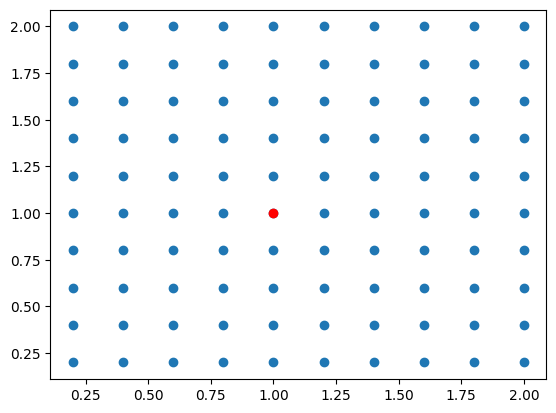

In [59]:
from matplotlib import pyplot as plt

x, y = grid.T
plt.scatter(x,y)
plt.scatter(center,center,color='r')
plt.show()

In [3]:
upper = 10
lower = 5

(3 % (upper - lower + 1)) + lower

8

In [11]:
((1 << 15) << 3) / 1000 / 60

4.369066666666667

In [66]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns

sns.set()

#Fixing seed for reproducibility
np.random.seed(0)

In [67]:
#Loading and rendering the gym environment
env = gym.make("Taxi-v3")
env.reset()

n_observations = env.observation_space.n
n_actions = env.action_space.n

#Initialize the Q-table to 0
Q = np.zeros((n_observations,n_actions))
print(Q)

#Getting the state space
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Action Space Discrete(6)
State Space Discrete(500)


Training score over time: -18.1205 7.05


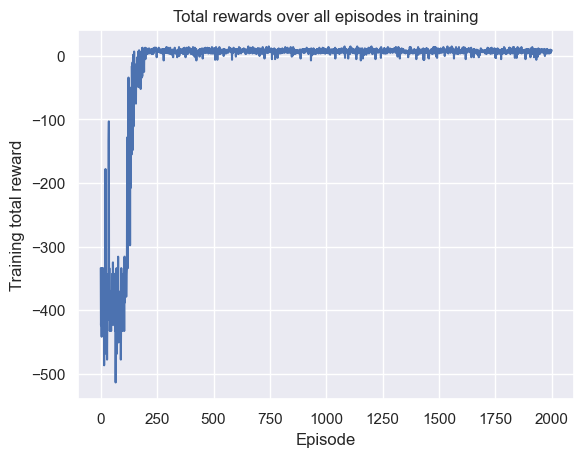

In [407]:
#Setting the hyperparameters

train_episodes = 2000   
max_steps = 100

alpha = 0.05 #learning rate                 
discount_factor = 0.99
# epsilon = 1                  
# max_epsilon = 1
# min_epsilon = 0.01         
# decay = 0.01

use_mine = True

if use_mine:
    # mine
    max_epsilon = 1
    min_epsilon = 0.01
    epsilon = max_epsilon
    decay = 0.01
    delta = (max_epsilon - min_epsilon) * decay


#Creating lists to keep track of reward and epsilon values
training_rewards = []  
epsilons = []
result_p = []
result_d = []
result_r = []

total_total_training_rewards = 0
prev_total_training_rewards = 0
for episode in range(train_episodes):
    #Reseting the environment each time as per requirement
    state, prob = env.reset()    
    #Starting the tracker for the rewards
    total_training_rewards = 0

    
    for step in range(max_steps):
        #Choosing an action given the states based on a random number
        exp_exp_tradeoff = random.uniform(0, 1) 
        
        
        ### STEP 2: SECOND option for choosing the initial action - exploit     
        #If the random number is larger than epsilon: employing exploitation 
        #and selecting best action 
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q[state,:])
            
        ### STEP 2: FIRST option for choosing the initial action - explore       
        #Otherwise, employing exploration: choosing a random action 
        else:
            action = env.action_space.sample()
            
            
        ### STEPs 3 & 4: performing the action and getting the reward     
        #Taking the action and getting the reward and outcome state
        val = env.step(action)
        new_state, reward, done, info, prob = val

        ### STEP 5: update the Q-table
        #Updating the Q-table using the Bellman equation
        Q[state, action] = Q[state, action] + alpha * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action]) 
        #Increasing our total reward and updating the state
        total_training_rewards += reward      
        state = new_state         
        
        #Ending the episode
        if done == True:
            #print ("Total reward for episode {}: {}".format(episode, total_training_rewards))
            break
    
    total_total_training_rewards += total_training_rewards

    if use_mine:

        p = total_total_training_rewards/(episode+1)
        diff = p

        new_epsilon = epsilon
        des = 1
        if episode > 0:
            prev_p = prev_total_training_rewards/(episode)
            diff = p - prev_p
            if diff > 0:
                des = 0
                # exploit
                new_epsilon -= delta
            else:
                # explore
                new_epsilon += delta
            result_p.append(p)
            result_d.append(des)


        new_epsilon = max(new_epsilon, min_epsilon)
        new_epsilon = min(new_epsilon, max_epsilon)
        epsilon = new_epsilon
    
    else:

        #Cutting down on exploration by reducing the epsilon 
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)
    
    #Adding the total reward and reduced epsilon values
    training_rewards.append(total_training_rewards)
    result_r.append(total_total_training_rewards/(episode+1))
    epsilons.append(epsilon)

    prev_total_training_rewards = total_total_training_rewards

print ("Training score over time: " + str(sum(training_rewards)/train_episodes), np.average(training_rewards[-100:]))

#Visualizing results and total reward over all episodes
x = range(train_episodes)
plt.plot(x, training_rewards)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total rewards over all episodes in training') 
plt.show()

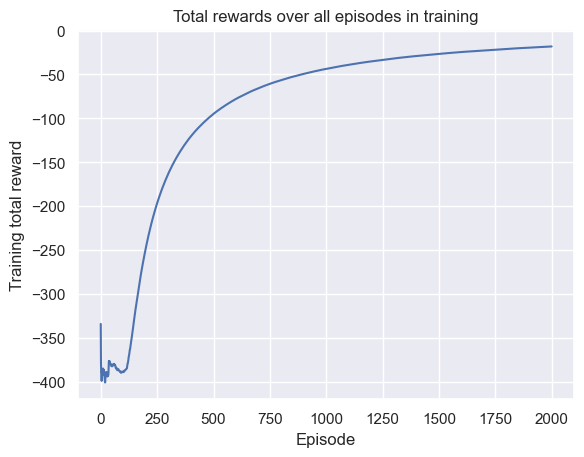

In [408]:
#Visualizing results and total reward over all episodes
x = range(train_episodes)
plt.plot(x, result_r)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total rewards over all episodes in training') 
plt.show()

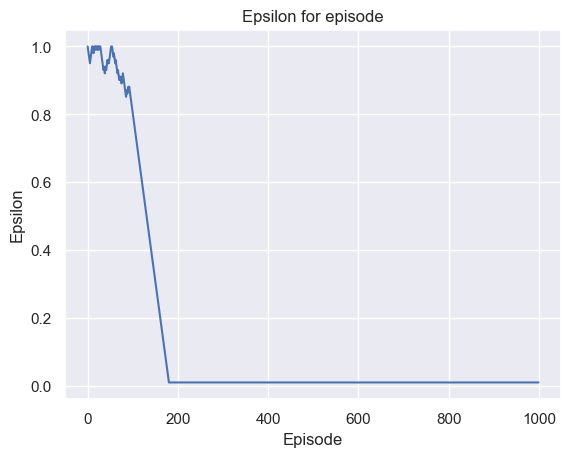

In [391]:
#Visualizing the epsilons over all episodes
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title("Epsilon for episode")
plt.show()

1000


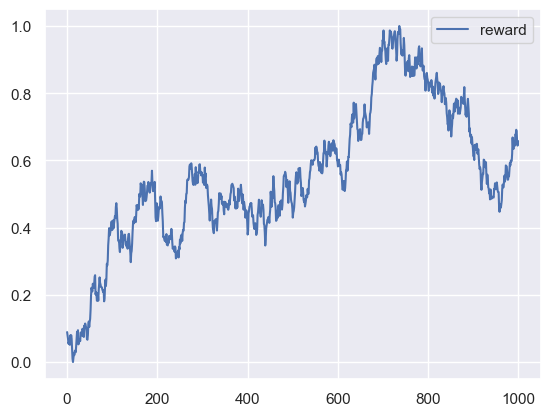

In [398]:
episodes = 1000
x = np.linspace(1, episodes, episodes)

def f(x):
    y = 0
    result = []
    for _ in x:
        result.append(y)
        y += np.random.normal(scale=1)
    return np.array(result)

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

pfree_i = NormalizeData(f(x))
print(len(pfree_i))

# log scale plot
plt.plot(pfree_i, label ='reward')
plt.legend()
plt.show()

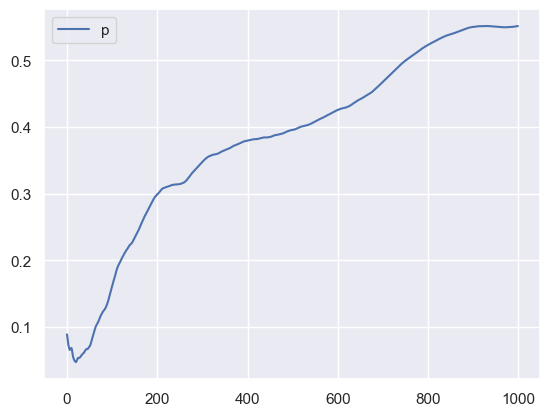

In [400]:
max_epsilon = 1
epsilon = max_epsilon
min_epsilon = 0.01
decay = 0.01
delta = (max_epsilon - min_epsilon) * decay

result_e = []
result_p = []

total_reward = 0
prev_total_reward = 0
for episode in range(episodes):
    
    reward = pfree_i[episode]
    total_reward += reward

    p = total_reward / (episode+1)
    new_epsilon = epsilon
    diff = p
    if episode > 0:
        prev_p = prev_total_reward / episode
        diff = p - prev_p
        if diff > 0:
            # exploit
            new_epsilon -= delta
        else:
            # explore
            new_epsilon += delta

    new_epsilon = max(new_epsilon, min_epsilon)
    new_epsilon = min(new_epsilon, max_epsilon)

    result_p.append(p)
    result_e.append(epsilon)

    epsilon = new_epsilon
    prev_total_reward = total_reward

# log scale plot
plt.plot(result_p, label ='p')
plt.legend()
plt.show()

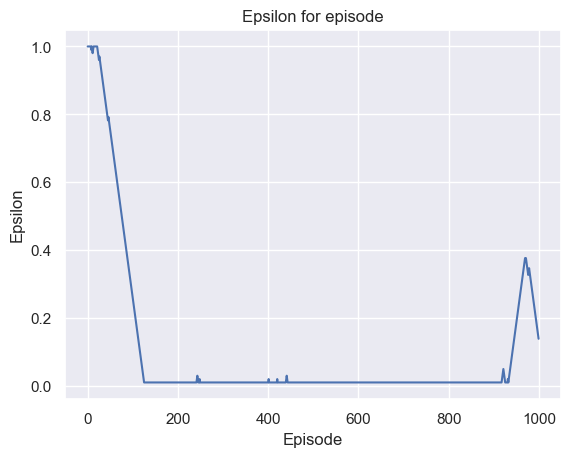

In [401]:
#Visualizing the epsilons over all episodes
plt.plot(result_e)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title("Epsilon for episode")
plt.show()

In [147]:
episode = 4

epsilon = max_epsilon
decay = 0.01
min_epsilon = 0.01
new_epsilon = max(min_epsilon, np.exp(-decay*episode))

print(epsilon, new_epsilon)

1 0.9607894391523232


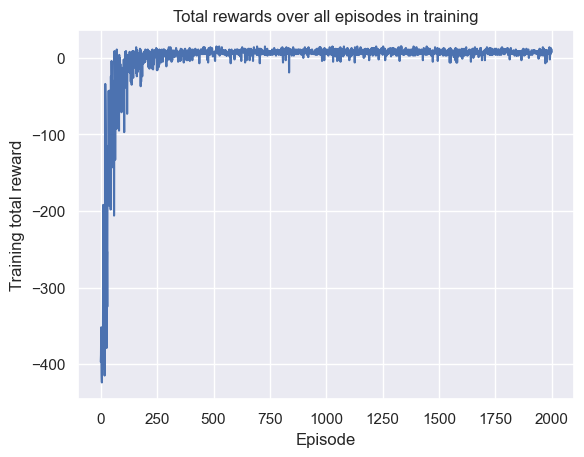

In [292]:
#Visualizing results and total reward over all episodes
x = range(train_episodes)
plt.plot(x, training_rewards)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total rewards over all episodes in training') 
plt.show()

In [2]:
import random
import math

app_pkPeriod = 1
app_pkPeriodVar = 0.1
diff = (app_pkPeriod*app_pkPeriodVar)
min_ = int(math.ceil((app_pkPeriod - diff) * 1000))
max_ = int(math.ceil((app_pkPeriod + diff) * 1000))
delay = random.randint(min_, max_)
print(min_, max_, delay)

900 1100 955


In [8]:
a = [54, 0, 33, 4, 2, 0]
a.reverse()
a

[0, 2, 4, 33, 0, 54]

In [32]:
src = [2, 0]
(src[0] << 8) | src[1]

512

In [52]:
import struct

src = [26, 108, 0]
bytes = ''.join([chr(c) for c in src]).encode()
val = struct.unpack('<I', bytes)
val

error: unpack requires a buffer of 4 bytes

In [61]:
int("0x000000a39b", 16)

41883